In [15]:
TEST = False

Check which hyper-parameters are required by TransE:

In [16]:
from pykeen.kge_models import UnstructuredModel, Region
UnstructuredModel.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'scoring_function',
 'normalization_of_entities']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [20]:
config = dict(
    metrics                     = [],    
     training_set_path           = '../../../data/fb15k-237/train.tsv',
    test_set_path               = '../../../data/fb15k-237/valid_200.tsv',
    #neg_test_set_path           = '../../../data/fb15k-237/valid_neg.tsv',
    mapping_path                = '../../../data/fb15k-237/',
    
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'UM',
    embedding_dim               = 50,
    scoring_function            = 1,  # corresponds to L1
    normalization_of_entities   = 2,  # corresponds to L2
    margin_loss                 = 1,
    es_metric                   = 'custom',
    
    learning_rate               = 0.0001,
    num_epochs                  = 500 if not TEST else 10,  
    batch_size                  = 2048,
    test_batch_size             = 6000,
    filter_negative_triples     = False,
    corrupt_relations           = False,
    neg_factor                  = 1,
    preferred_device            = 'gpu'
)

In [21]:
output_directory = '../../../models/FB15k-237_UM_dim{}_lr{}_margin{}_epochs{}_bs{}_esmetric-{}/'.format(
    config['embedding_dim'],
    str(config['learning_rate']).replace('.',''),
    config['margin_loss'],
    config['num_epochs'],
    config['batch_size'],
    config['es_metric']
)
output_directory

'../../../models/FB15k-237_UM_dim50_lr00001_margin1_epochs500_bs2048_esmetric-custom/'

In [22]:
if TEST:
    output_directory = '../../../models/test'

In [23]:
import logging
import os
import sys
import time
import pykeen

In [24]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [25]:
print(sys.version)

3.6.5 (default, Mar 31 2018, 19:45:04) [GCC]


In [26]:
print(time.asctime())

Tue Oct 29 10:55:52 2019


In [27]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate UM:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...
INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
DEBUG:pykeen.utilities.train_utils:****running model on cuda:0****


{'metrics': [], 'training_set_path': '../../../data/fb15k-237/train.tsv', 'test_set_path': '../../../data/fb15k-237/valid_200.tsv', 'mapping_path': '../../../data/fb15k-237/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'UM', 'embedding_dim': 50, 'scoring_function': 1, 'normalization_of_entities': 2, 'margin_loss': 1, 'es_metric': 'custom', 'learning_rate': 0.0001, 'num_epochs': 500, 'batch_size': 2048, 'test_batch_size': 6000, 'filter_negative_triples': False, 'corrupt_relations': False, 'neg_factor': 1, 'preferred_device': 'cuda:0', 'pykeen-version': '0.0.26-dev', 'num_entities': 14541, 'num_relations': 237}


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.011094438556646744  ---- rank/hits@10: (0.008802519769028563, 0.015)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   0 /  500 (0.3s):  57.941 ---- 38.259 ---- 0.01 ----   1
INFO:pykeen.utilities.train_utils:Epoch   1 /  500 (0.3s):  38.591 ---- 32.442 ---- 0.01 ----   2
INFO:pykeen.utilities.train_utils:Epoch   2 /  500 (0.3s):  31.769 ---- 29.816 ---- 0.01 ----   3
INFO:pykeen.utilities.train_utils:Epoch   3 /  500 (0.3s):  27.582 ---- 28.263 ---- 0.01 ----   4
INFO:pykeen.utilities.train_utils:Epoch   4 /  500 (0.3s):  24.606 ---- 29.200 ---- 0.01 ----   5
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.010474350836688177  ---- rank/hits@10: (0.00901366844170361, 0.0125)
INFO:pykeen

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.01694637006162709  ---- rank/hits@10: (0.013591586087940113, 0.0225)
INFO:pykeen.utilities.train_utils:Epoch  55 /  500 (0.3s):  3.053 ---- 14.608 ---- 0.02 ----   6
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.01713639372664864  ---- rank/hits@10: (0.013837722765209719, 0.0225)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  56 /  500 (0.3s):  3.031 ---- 14.516 ---- 0.02 ----   1
INFO:pykeen.utilities.train_utils:Epoch  57 /  500 (0.3s):  2.961 ---- 14.622 ---- 0.02 ----   2
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.017722144043069495  ---- rank/hits@10: (0.013726240109253836, 0.0

INFO:pykeen.utilities.train_utils:Epoch  89 /  500 (0.3s):  1.786 ---- 11.965 ---- 0.02 ----   4
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.018225586192571436  ---- rank/hits@10: (0.014339828818738475, 0.025)
INFO:pykeen.utilities.train_utils:Epoch  90 /  500 (0.3s):  1.796 ---- 12.280 ---- 0.02 ----   5
INFO:pykeen.utilities.train_utils:Epoch  91 /  500 (0.3s):  1.762 ---- 12.143 ---- 0.02 ----   6
INFO:pykeen.utilities.train_utils:Epoch  92 /  500 (0.3s):  1.750 ---- 11.978 ---- 0.02 ----   7
INFO:pykeen.utilities.train_utils:Epoch  93 /  500 (0.3s):  1.710 ---- 12.364 ---- 0.02 ----   8
INFO:pykeen.utilities.train_utils:Epoch  94 /  500 (0.3s):  1.697 ---- 12.250 ---- 0.02 ----   9
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.01899848289137735  ---- rank/hits@10: (0.014512118418135893

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.018061637125024246  ---- rank/hits@10: (0.015085802994010317, 0.0225)
INFO:pykeen.utilities.train_utils:Epoch 139 /  500 (0.3s):  1.134 ---- 10.612 ---- 0.02 ----  54
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.01630034550265375  ---- rank/hits@10: (0.013755766358939082, 0.02)
INFO:pykeen.utilities.train_utils:Epoch 140 /  500 (0.3s):  1.109 ---- 10.469 ---- 0.02 ----  55
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.016705370442532404  ---- rank/hits@10: (0.014342679630358948, 0.02)
INFO:pykeen.utilities.train_utils:Epoch 141 /  500 (0.3s):  1.157 ---- 10.296 ---- 0.02 ----  56
INFO:pykeen.utilities.train_utils:Epoch 142 /  500 (0.3s):  1.145 ---

INFO:pykeen.utilities.train_utils:Epoch 180 /  500 (0.3s):  0.911 ---- 9.184 ---- 0.02 ----  95
INFO:pykeen.utilities.train_utils:Epoch 181 /  500 (0.3s):  0.942 ---- 8.902 ---- 0.02 ----  96
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.46s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.017794689568331645  ---- rank/hits@10: (0.01471699859088536, 0.0225)
INFO:pykeen.utilities.train_utils:Epoch 182 /  500 (0.3s):  0.903 ---- 8.652 ---- 0.02 ----  97
INFO:pykeen.utilities.train_utils:Epoch 183 /  500 (0.3s):  0.916 ---- 8.967 ---- 0.02 ----  98
INFO:pykeen.utilities.train_utils:Epoch 184 /  500 (0.3s):  0.918 ---- 9.119 ---- 0.02 ----  99
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.49s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.017896556228336115  ---- rank/hits@10: (0.01485687643717618, 0.0225)
INFO:pykeen.utilities.train_utils:Epoch 185 /  500 (0.3s):  0.901 ---- 8.714 ---- 0.02 ---- 

INFO:pykeen.utilities.train_utils:Epoch 229 /  500 (0.3s):  0.767 ---- 7.837 ---- 0.02 ----  15
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.018925186408315243  ---- rank/hits@10: (0.016330574816568796, 0.0225)
INFO:pykeen.utilities.train_utils:Epoch 230 /  500 (0.3s):  0.746 ---- 7.795 ---- 0.02 ----  16
INFO:pykeen.utilities.train_utils:Epoch 231 /  500 (0.3s):  0.748 ---- 8.132 ---- 0.02 ----  17
INFO:pykeen.utilities.train_utils:Epoch 232 /  500 (0.3s):  0.746 ---- 8.110 ---- 0.02 ----  18
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.019953364054020536  ---- rank/hits@10: (0.015656781219497144, 0.0275)
INFO:pykeen.utilities.train_utils:Epoch 233 /  500 (0.3s):  0.736 ---- 7.661 ---- 0.02 ----  19
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.49s seconds

INFO:pykeen.utilities.train_utils:Epoch 280 /  500 (0.3s):  0.644 ---- 7.640 ---- 0.02 ----  22
INFO:pykeen.utilities.train_utils:Epoch 281 /  500 (0.3s):  0.631 ---- 7.485 ---- 0.02 ----  23
INFO:pykeen.utilities.train_utils:Epoch 282 /  500 (0.3s):  0.632 ---- 7.516 ---- 0.02 ----  24
INFO:pykeen.utilities.train_utils:Epoch 283 /  500 (0.3s):  0.625 ---- 7.681 ---- 0.02 ----  25
INFO:pykeen.utilities.train_utils:Epoch 284 /  500 (0.3s):  0.623 ---- 7.600 ---- 0.02 ----  26
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.023551213789177416  ---- rank/hits@10: (0.017746265292700996, 0.035)
INFO:pykeen.utilities.train_utils:Epoch 285 /  500 (0.3s):  0.640 ---- 7.776 ---- 0.02 ----  27
INFO:pykeen.utilities.train_utils:Epoch 286 /  500 (0.3s):  0.629 ---- 7.540 ---- 0.02 ----  28
INFO:pykeen.utilities.train_utils:Epoch 287 /  500 (0.3s):  0.639 ---- 7.283 ---- 0.02 ----  29
INFO:pykeen.utilit

INFO:pykeen.utilities.train_utils:Epoch 333 /  500 (0.3s):  0.563 ---- 7.480 ---- 0.02 ----  19
INFO:pykeen.utilities.train_utils:Epoch 334 /  500 (0.3s):  0.559 ---- 7.240 ---- 0.02 ----  20
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.02350716933951634  ---- rank/hits@10: (0.017119254057795526, 0.0375)
INFO:pykeen.utilities.train_utils:Epoch 335 /  500 (0.3s):  0.569 ---- 7.275 ---- 0.02 ----  21
INFO:pykeen.utilities.train_utils:Epoch 336 /  500 (0.3s):  0.552 ---- 7.247 ---- 0.02 ----  22
INFO:pykeen.utilities.train_utils:Epoch 337 /  500 (0.3s):  0.546 ---- 7.079 ---- 0.02 ----  23
INFO:pykeen.utilities.train_utils:Epoch 338 /  500 (0.3s):  0.562 ---- 6.969 ---- 0.02 ----  24
INFO:pykeen.utilities.train_utils:Epoch 339 /  500 (0.3s):  0.561 ---- 7.132 ---- 0.02 ----  25
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.023531964799904947  ---- rank/hits@10: (0.017145567662835627, 0.0375)
INFO:pykeen.utilities.train_utils:Epoch 390 /  500 (0.3s):  0.503 ---- 7.068 ---- 0.02 ----  76
INFO:pykeen.utilities.train_utils:Epoch 391 /  500 (0.3s):  0.499 ---- 7.103 ---- 0.02 ----  77
INFO:pykeen.utilities.train_utils:Epoch 392 /  500 (0.3s):  0.503 ---- 7.082 ---- 0.02 ----  78
INFO:pykeen.utilities.train_utils:Epoch 393 /  500 (0.3s):  0.506 ---- 7.225 ---- 0.02 ----  79
INFO:pykeen.utilities.train_utils:Epoch 394 /  500 (0.3s):  0.495 ---- 7.357 ---- 0.02 ----  80
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.45s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.025322788426896763  ---- rank/hits@10: (0.018525296150510736, 0.04)
INFO:pykeen.utilities.train_utils:Epoch 395 /  500 (0.3s):  0.499 ---- 7.288 ---- 0.03 ---- 

INFO:pykeen.utilities.train_utils:Epoch 436 /  500 (0.3s):  0.460 ---- 6.438 ---- 0.02 ---- 122
INFO:pykeen.utilities.train_utils:Epoch 437 /  500 (0.3s):  0.473 ---- 6.573 ---- 0.02 ---- 123
INFO:pykeen.utilities.train_utils:Epoch 438 /  500 (0.3s):  0.461 ---- 6.609 ---- 0.02 ---- 124
INFO:pykeen.utilities.train_utils:Epoch 439 /  500 (0.3s):  0.471 ---- 6.496 ---- 0.02 ---- 125
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 1.46s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.02235759158031146  ---- rank/hits@10: (0.01703988478344558, 0.0325)
INFO:pykeen.utilities.train_utils:Epoch 440 /  500 (0.3s):  0.463 ---- 6.506 ---- 0.02 ---- 126
INFO:pykeen.utilities.train_utils:Epoch 441 /  500 (0.3s):  0.465 ---- 6.655 ---- 0.02 ---- 127
INFO:pykeen.utilities.train_utils:Epoch 442 /  500 (0.3s):  0.448 ---- 6.656 ---- 0.02 ---- 128
INFO:pykeen.utilities.train_utils:Epoch 443 /  500 (0.3s):  0.453 ---- 6.636 ---- 0.02 ---- 129
INFO:pykeen.utiliti

INFO:pykeen.utilities.train_utils:Epoch 495 /  500 (0.3s):  0.430 ---- 6.679 ---- 0.02 ---- 181
INFO:pykeen.utilities.train_utils:Epoch 496 /  500 (0.3s):  0.428 ---- 6.670 ---- 0.02 ---- 182
INFO:pykeen.utilities.train_utils:Epoch 497 /  500 (0.3s):  0.419 ---- 6.652 ---- 0.02 ---- 183
INFO:pykeen.utilities.train_utils:Epoch 498 /  500 (0.3s):  0.420 ---- 6.774 ---- 0.02 ---- 184
INFO:pykeen.utilities.train_utils:Epoch 499 /  500 (0.3s):  0.429 ---- 6.549 ---- 0.02 ---- 185
DEBUG:pykeen.utilities.train_utils:training took 379.08s seconds
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.00s seconds


Check result entries:

Visualize loss values:

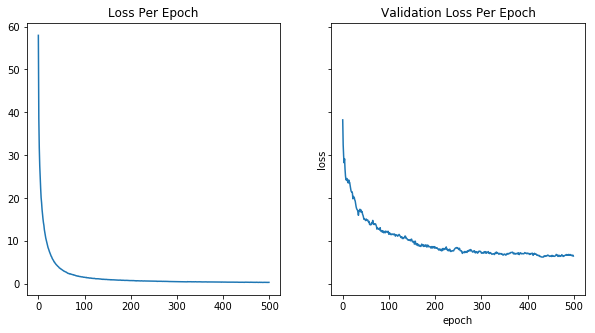

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)
losses = results.results['losses']
epochs = np.arange(len(losses))
ax1.set_title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax1.plot(epochs, losses) #plt.subplot(122)
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax2.plot(epochs, val_losses)
plt.show()


from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(losses)) * 15
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [32]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [33]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [34]:
model_dir = '../../../models/'
models = os.listdir(model_dir)
models

['test',
 'region_FB15k_20191023-1742_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_bs8192',
 'FB15k-237_region_20191028_1118_dim50_full_rad1_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs2000_esmetric-custom_vs8192',
 'FB15k-237_UM_dim50_lr00001_margin1_epochs500_bs2048_esmetric-custom',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_final',
 'FB15k237_TransE_20191024-1716_dim50_loss-MRL_lr001_margin1_epochs1000_bs8192_esmetric-custom',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom',
 'FB15k237_region_20191024-1716_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-

In [35]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    #'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = '../../../data/fb15k-237/train.tsv',
    config['test_set_path'] = '../../../data/fb15k-237/valid.tsv',
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14541
    config[pkc.NUM_RELATIONS] = 237
    config[pkc.PREFERRED_DEVICE] = 'gpu'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [37]:
#config[pkc.PREFERRED_DEVICE] = 'gpu1'
pipeline = Pipeline(config)
config[pkc.PREFERRED_DEVICE] = pipeline.device_name
config['test_batch_size'] = 2**10
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id

    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.unstructured_model.UnstructuredModel

In [38]:
metrics =[pkc.MEAN_RANK, pkc.HITS_AT_K] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]

#### Evaluate RelationalTriple

In [40]:
val_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k-237/valid.tsv',
    #neg_test_path = '../../../data/fb15k-237/valid.tsv',
    metrics=metrics,
    threshold_search=True,
    single_threshold=False,
    filter_neg_triples=True
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 2211.95s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.01968744806664897, hits_at_k={1: 0.0051325919589392645, 3: 0.012004562303963502, 5: 0.021129170230966637, 10: 0.04294268605645851}, precision=None, recall=None, accuracy=None, fscore=None)


In [ ]:
val_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/valid.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/valid_neg.tsv', 
    metrics=['prediction'],
    threshold_search=True,
    single_threshold=False
)

In [ ]:
val_results_ = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/valid.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/valid_neg.tsv', 
    metrics=['prediction'],
    threshold_search=True,
    single_threshold=True
)

In [ ]:
val_results['eval_summary']

In [ ]:
test_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/clean_test.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/clean_test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

In [ ]:
test_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K_237/test.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K_237/test_neg.tsv',
    metrics= ['prediction'],
    threshold_search=False
)

In [ ]:
model.relation_thresholds.tolist()

In [ ]:
test_results['eval_summary']

In [ ]:
json.dump(val_results['eval_summary'], open(os.path.join(output_directory, 'valid_evaluation_summary.json'),"w"))

In [ ]:
json.dump(test_results['eval_summary'], open(os.path.join(output_directory, 'evaluation_summary.json'),"w"))

## Load results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [ ]:
%matplotlib inline

In [ ]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

In [ ]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'TransE_FB15k_dim50_lr001_margin1_epochs1000'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [ ]:
results.keys()

In [ ]:
results['final_configuration']

In [ ]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
results['eval_summary']